1. Menentukan library yang digunakan

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

2. Load dataset

In [4]:
dataset_diabetes = pd.read_csv('diabetes.csv')
dataset_diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset_diabetes.shape

(768, 9)

In [6]:
dataset_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# Memisahkan data dan label
X = dataset_diabetes.drop (columns='Outcome', axis=1)
Y = dataset_diabetes['Outcome']

In [8]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


3. Standarisasi Data

In [10]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [12]:
standarizedData = scaler.transform(X)
print(standarizedData)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
X = standarizedData
Y = dataset_diabetes['Outcome']

In [14]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


4. Memisahkan data training dan data testing

In [17]:
# Membagi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


5. Membuat data training menggunakan SVM

In [20]:
# Membuat data training menggunakan svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. Membuat evaluasi untuk mengukur tingkat akurasi

In [25]:
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
print('Akurasi data training: ',training_data_accuracy)

Akurasi data training:  0.7866449511400652


In [26]:
X_test_predict = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predict, Y_test)
print('Akurasi data testing: ', testing_data_accuracy)

Akurasi data testing:  0.7727272727272727


7. Membuat model prediksi

In [28]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_array = np.array(input_data)
input_data_reshape = input_data_as_array.reshape(1, -1)
standar_data = scaler.transform(input_data_reshape)
print(standar_data)

prediction = classifier.predict(standar_data)
print(prediction)

if (prediction[0] == 0) :
    print('Pasien negatif diabetes')
else :
    print('Pasien positif diabetes')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
Pasien positif diabetes


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. Simpan model

In [30]:
import pickle

file_name = 'model_diabetes.sav'
pickle.dump(classifier, open(file_name, 'wb'))

Matplotlib is building the font cache; this may take a moment.


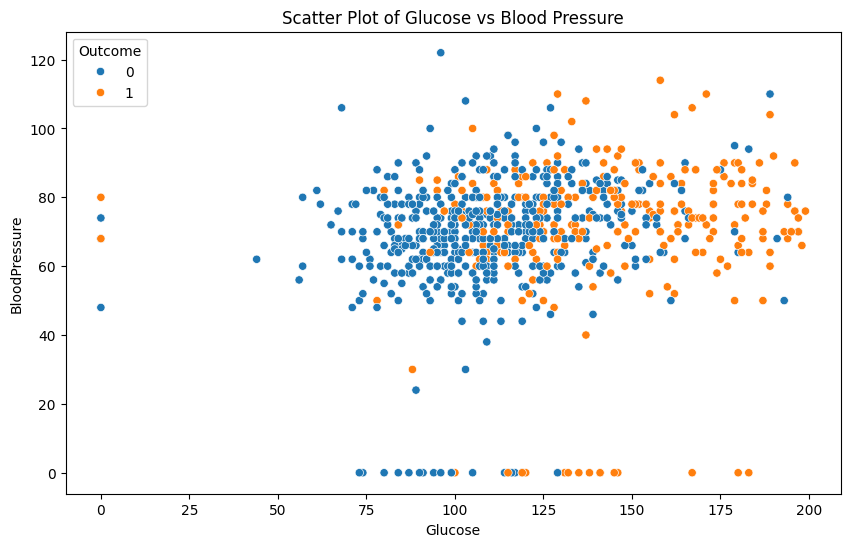

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load dataset
dataset_diabetes = pd.read_csv('diabetes.csv')

# Scatter plot between Glucose and BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_diabetes, x='Glucose', y='BloodPressure', hue='Outcome')
plt.title('Scatter Plot of Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend(title='Outcome')
plt.show()